# League of Legends Exploration of Champion Classes 

League of Legends features a large roster of champions (155 as of current patch 11.3), each designed to fill a specific play style or role in a team. Despite the variations, theses each of these champions can be separated into 7 different primary classes and a total of 13 subclasses. 
1. Controller<br>
    1.1 Enchanter<br>
    1.2 Catcher<br>
2. Fighter<br>
    2.1 Juggernaut<br>
    2.2 Diver<br>
3. Mage<br>
    3.1 Burst<br>
    3.2 Battlemage<br>
    3.3 Artillery<br>
4. Marksman<br>
5. Slayer<br>
    5.1 Assassin<br>
    5.2 Skirmisher<br>
6. Tank<br>
    6.1 Vanguard<br>
    6.2 Warden<br>
7. Specialist<br>

In this analysis, we will be taking a look at the distribution of champions stats among classes. 

We will be using data scraped form the [League of Legends Wiki](https://leagueoflegends.fandom.com/wiki/League_of_Legends_Wiki). The web scraping code and the datasets can be both found in the folder. It is currently Patch 12.3, with 158 champions released and the latest champion is Zeri. 

# Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Champions Dataset

In [3]:
champ = pd.read_csv('champions.csv')
champ.head()

,name,description,href,class,release_date,last_changed,be_cost,rp_cost
0,Aatrox,the Darkin Blade,/wiki/Aatrox/LoL,Juggernaut,2013-06-13,V11.19,4800,880
1,Ahri,the Nine-Tailed Fox,/wiki/Ahri/LoL,Burst,2011-12-14,V12.3,3150,790
2,Akali,the Rogue Assassin,/wiki/Akali/LoL,Assassin,2010-05-11,V11.22,3150,790
3,Akshan,the Rogue Sentinel,/wiki/Akshan/LoL,"Marksman,Assassin",2021-07-22,V12.3,6300,975
4,Alistar,the Minotaur,/wiki/Alistar/LoL,Vanguard,2009-02-21,V11.11,1350,585


In [4]:
champ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          158 non-null    object
 1   description   158 non-null    object
 2   href          158 non-null    object
 3   class         158 non-null    object
 4   release_date  158 non-null    object
 5   last_changed  158 non-null    object
 6   be_cost       158 non-null    int64 
 7   rp_cost       158 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 10.0+ KB


- `name` -  Champion name
- `description` - Champion Description/Nickname
- `href` - Link to wiki page
- `class` - Champion class
- `release_date` - Champion release date
- `last_changed` - Last time champion was changed (ie. nerfs, buffs) 
- `be_cost` - Blue Essence cost
- `rp_cost` - RP cost

### Separating Subclass

In [5]:
champ['class'].unique()

array(['Juggernaut', 'Burst', 'Assassin', 'Marksman,Assassin', 'Vanguard',
       'Battlemage', 'Marksman', 'Specialist', 'Catcher', 'Warden',
       'Diver', 'Assassin,Diver', 'Skirmisher', 'Enchanter', 'Artillery',
       'Marksman,Catcher', 'Burst,Enchanter', 'Burst,Artillery',
       'Burst,Catcher', 'Assassin,Catcher', 'Marksman,Enchanter',
       'Burst,Skirmisher', 'Enchanter,Warden', 'Marksman,Artillery',
       'Assassin,Skirmisher'], dtype=object)

The current data has 24 unique classes and 11 of these classes are combination of two different classes. We will be separating these dual classes into `subclass_1` and `subclass_2`.

In [6]:
champ[['subclass_1', 'subclass_2']] = champ['class'].str.split(',',1, expand=True)
champ.head()

,name,description,href,class,release_date,last_changed,be_cost,rp_cost,subclass_1,subclass_2
0,Aatrox,the Darkin Blade,/wiki/Aatrox/LoL,Juggernaut,2013-06-13,V11.19,4800,880,Juggernaut,None
1,Ahri,the Nine-Tailed Fox,/wiki/Ahri/LoL,Burst,2011-12-14,V12.3,3150,790,Burst,None
2,Akali,the Rogue Assassin,/wiki/Akali/LoL,Assassin,2010-05-11,V11.22,3150,790,Assassin,None
3,Akshan,the Rogue Sentinel,/wiki/Akshan/LoL,"Marksman,Assassin",2021-07-22,V12.3,6300,975,Marksman,Assassin
4,Alistar,the Minotaur,/wiki/Alistar/LoL,Vanguard,2009-02-21,V11.11,1350,585,Vanguard,None


In [7]:
champ['subclass_1'].unique()

array(['Juggernaut', 'Burst', 'Assassin', 'Marksman', 'Vanguard',
       'Battlemage', 'Specialist', 'Catcher', 'Warden', 'Diver',
       'Skirmisher', 'Enchanter', 'Artillery'], dtype=object)

### Adding Primary Classes

   Since majority of the champions do not have a subclass, we will match a champion's primary class to `subclass_1`. 

In [8]:
controller = ['Enchanter', 'Catcher']
fighter = ['Juggernaut', 'Diver']
mage = ['Burst', 'Battlemage', 'Artillery']
marksman = ['Marksman']
slayer = ['Assassin', 'Skirmisher']
tank = ['Vanguard', 'Warden']
specialist = ['Specialist']

def assign_primary(subclass):
    if subclass in controller:
        return 'Controller'
    if subclass in fighter:
        return 'Fighter'
    if subclass in mage:
        return 'Mage'
    if subclass in marksman:
        return 'Marksman'
    if subclass in slayer:
        return 'Slayer'
    if subclass in tank:
        return 'Tank'
    if subclass in specialist:
        return 'Specialist'
    
champ['primary_class']= champ['subclass_1'].apply(assign_primary)
champ.head()

,name,description,href,class,release_date,last_changed,be_cost,rp_cost,subclass_1,subclass_2,primary_class
0,Aatrox,the Darkin Blade,/wiki/Aatrox/LoL,Juggernaut,2013-06-13,V11.19,4800,880,Juggernaut,None,Fighter
1,Ahri,the Nine-Tailed Fox,/wiki/Ahri/LoL,Burst,2011-12-14,V12.3,3150,790,Burst,None,Mage
2,Akali,the Rogue Assassin,/wiki/Akali/LoL,Assassin,2010-05-11,V11.22,3150,790,Assassin,None,Slayer
3,Akshan,the Rogue Sentinel,/wiki/Akshan/LoL,"Marksman,Assassin",2021-07-22,V12.3,6300,975,Marksman,Assassin,Marksman
4,Alistar,the Minotaur,/wiki/Alistar/LoL,Vanguard,2009-02-21,V11.11,1350,585,Vanguard,None,Tank


## Champion Stat

In [9]:
stat = pd.read_csv('champion_stats.csv')
stat.head()

,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range
0,Aatrox,580.0,90,3.00,1.00,0.0,0.0,0.000,0.0,60.0,5.00,0.651,+2.5%,38.0,3.25,32.0,1.25,345,175
1,Ahri,500.0,82,2.50,0.60,418.0,25.0,8.000,0.8,53.0,3.00,0.668,+2%,18.0,3.50,30.0,0.50,330,550
2,Akali,500.0,105,9.00,0.90,200.0,0.0,50.000,0.0,62.0,3.30,0.625,+3.2%,23.0,3.50,37.0,1.25,345,125
3,Akshan,560.0,90,3.75,0.65,350.0,40.0,8.175,0.7,52.0,3.50,0.638,+4%,26.0,3.00,30.0,0.50,330,500
4,Alistar,600.0,106,8.50,0.85,350.0,40.0,8.500,0.8,62.0,3.75,0.625,+2.125%,44.0,3.50,32.0,1.25,330,125


In [10]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Champions  160 non-null    object 
 1   HP         160 non-null    float64
 2   HP+        160 non-null    int64  
 3   HP5        160 non-null    float64
 4   HP5+       160 non-null    float64
 5   MP         160 non-null    float64
 6   MP+        160 non-null    float64
 7   MP5        160 non-null    float64
 8   MP5+       160 non-null    float64
 9   AD         160 non-null    float64
 10  AD+        160 non-null    float64
 11  AS         160 non-null    float64
 12  AS+        160 non-null    object 
 13  AR         160 non-null    float64
 14  AR+        160 non-null    float64
 15  MR         160 non-null    float64
 16  MR+        160 non-null    float64
 17  MS         160 non-null    int64  
 18  Range      160 non-null    int64  
dtypes: float64(14), int64(3), object(2)
memory usage: 

- `Champions` - Champion name
- `HP` - Level 1 HP
- `HP+` - HP gained per level
- `HP5` - HP regeneration per 5 seconds 
- `HP5+`- HP regeneration gained per level
- `MP` - Level 1 Mana Pool
- `MP+` - MP gained per level
- `MP5` - Mana regeneration per 5 seconds 
- `MP5+`- Mana regeneration gained per level
- `AD` - Level 1 Attack Damage
- `AD+` - AD gained per level
- `AS` - Level 1 Attack Speed
- `AS+` - Percent AS gained per level
- `AR` - Level 1 Armor
- `AR+` - Armor gained per level
- `MR` - Level 1 Magic Resist
- `MR+` - MR gained per level
- `MS` - Movement Speed
- `Range` - Champion range

Note that MS (Movement Speed) and Range are static and do not increase per level. 

### Converting AS to float

We are not missing any columns, but we want to make sure all of the stats into float values so it is easier to analyze. Thus we will be converting `AS+` into a float. 

In [11]:
stat['AS+'].head(5)

0      +2.5%
1        +2%
2      +3.2%
3        +4%
4    +2.125%
Name: AS+, dtype: object

In [12]:
stat['AS+'] = stat['AS+'].str.strip('%+').astype(float)
stat['AS+'].head(5)

0    2.500
1    2.000
2    3.200
3    4.000
4    2.125
Name: AS+, dtype: float64

In [13]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Champions  160 non-null    object 
 1   HP         160 non-null    float64
 2   HP+        160 non-null    int64  
 3   HP5        160 non-null    float64
 4   HP5+       160 non-null    float64
 5   MP         160 non-null    float64
 6   MP+        160 non-null    float64
 7   MP5        160 non-null    float64
 8   MP5+       160 non-null    float64
 9   AD         160 non-null    float64
 10  AD+        160 non-null    float64
 11  AS         160 non-null    float64
 12  AS+        160 non-null    float64
 13  AR         160 non-null    float64
 14  AR+        160 non-null    float64
 15  MR         160 non-null    float64
 16  MR+        160 non-null    float64
 17  MS         160 non-null    int64  
 18  Range      160 non-null    int64  
dtypes: float64(15), int64(3), object(1)
memory usage: 

### Mismatch Number of Rows 

In [14]:
print(champ.shape)
print(stat.shape)

(158, 11)
(160, 19)


When comparing the size of the two datasets, we see that `champ` has 155 rows and `stat` has 157 rows. There are currently 155 champions released, so we want to see where the extra 2 rows come form.  

In [15]:
stat['Champions'] = stat['Champions'].str.strip()
champ['name'] = champ['name'].str.strip()

missing = stat.merge(champ, left_on='Champions', right_on ='name', how='outer')
missing[missing['name'].isna()]

,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range,name,description,href,class,release_date,last_changed,be_cost,rp_cost,subclass_1,subclass_2,primary_class
62,Kled & Skaarl,740.0,130,6.0,0.75,100.0,0.0,0.0,0.0,65.0,3.5,0.625,3.5,35.0,4.0,28.0,1.25,345,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Mega Gnar,610.0,108,4.5,1.75,100.0,0.0,0.0,0.0,65.0,5.5,0.625,0.5,35.5,5.5,33.5,4.00,335,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 2 values from `stat` that is not in `champ`. 
- Kled & Skaarl
- Mega Gnar

In [16]:
stat[(stat['Champions'] == 'Kled') | (stat['Champions'] == 'Kled & Skaarl')]

,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range
61,Kled,340.0,70,6.0,0.75,100.0,0.0,0.0,0.0,65.0,3.5,0.625,3.5,35.0,4.0,28.0,1.25,285,250
62,Kled & Skaarl,740.0,130,6.0,0.75,100.0,0.0,0.0,0.0,65.0,3.5,0.625,3.5,35.0,4.0,28.0,1.25,345,125


In [17]:
stat[(stat['Champions'] == 'Gnar') | (stat['Champions'] == 'Mega Gnar')]

,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range
35,Gnar,510.0,65,4.5,1.75,100.0,0.0,0.0,0.0,57.0,3.0,0.625,6.0,32.0,2.5,30.0,0.5,335,400
76,Mega Gnar,610.0,108,4.5,1.75,100.0,0.0,0.0,0.0,65.0,5.5,0.625,0.5,35.5,5.5,33.5,4.0,335,175


These two are special cases where the same champion have two different forms and two different base stats. As of now, we will leave it alone. 

## Number of Primary Classes and Subclasses

### Primary Classes

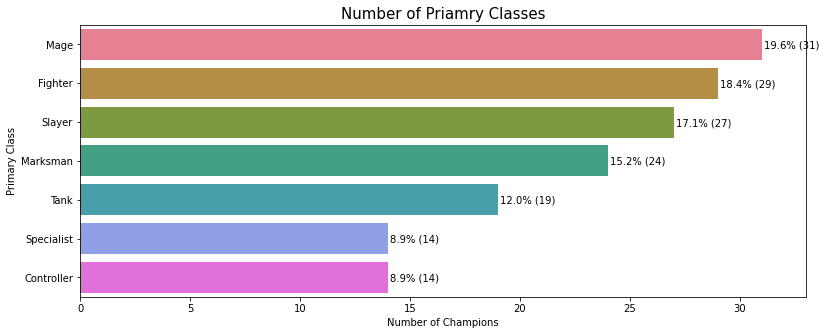

In [18]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = sns.countplot(
    y='primary_class', 
    data=champ, 
    order=champ['primary_class'].value_counts().index, 
    palette='husl')

count = list(champ['primary_class'].value_counts())

for p, c in zip(ax.patches, count):
    percentage = '{:.1f}%'.format(100 * p.get_width()/len(champ))
    x = p.get_x() + p.get_width() + .1
    y = p.get_y() + p.get_height()/2 + .1
    ax.annotate(f'{percentage} ({c})', (x, y))
    
ax.set_title('Number of Priamry Classes', fontsize = 15)
ax.set_xlabel('Number of Champions')
ax.set_ylabel('Primary Class')
ax.set_xlim(0, 33)

plt.show()

- Mage is the most popular primary class type followed by Fighter and Slayer
- Specialist and Controller are the least common class with 14 each. 

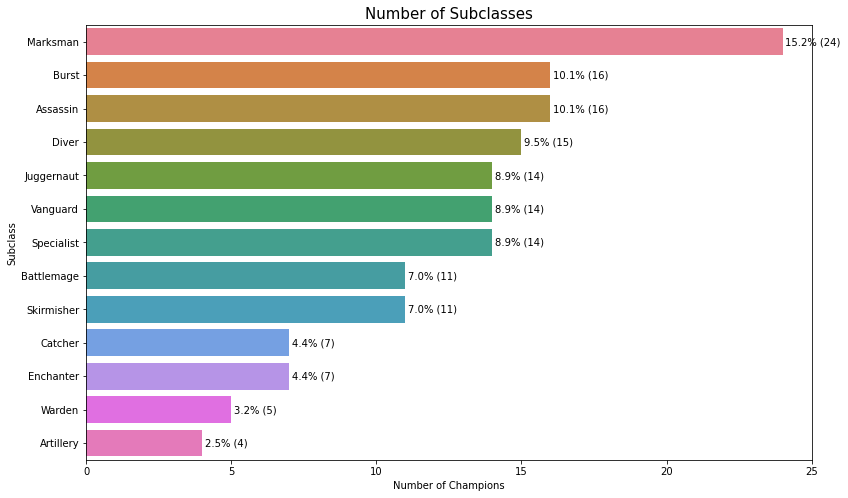

In [19]:
fig, ax = plt.subplots(figsize=(13, 8))
ax = sns.countplot(
    y='subclass_1', 
    data=champ, 
    order=champ['subclass_1'].value_counts().index, 
    palette='husl')

count = list(champ['subclass_1'].value_counts())

for p,c in zip(ax.patches, count):
    percentage = '{:.1f}%'.format(100 * p.get_width()/len(champ))
    x = p.get_x() + p.get_width() + .1
    y = p.get_y() + p.get_height()/2 + .1
    ax.annotate(f'{percentage} ({c})', (x, y))
    
    
ax.set_title('Number of Subclasses', fontsize = 15)
ax.set_xlabel('Number of Champions')
ax.set_ylabel('Subclass')
ax.set_xlim(0, 25)


plt.show()

- Marksman is by far the most common with 22, but this is partly because marksman does not have any subclasses
- Same idea applies to Specialist in the top half with 14.
- Warden and Artillery are by far least common with 5 and 4 respectively. 
- The mean number of champions in each subclass is 11.9

## Overview of Champion and Class Stats

We will be working with the subclass for the stats as primary class can span different playstyles despite being in the same class. An example of this would be Controller, where enchanter serve the role healers/shelders while catchers are more akin to tanks. 

We will once again use subclass_1 for this analysis since only 13 out of the 155 total champions have secondary subclass.

In [20]:
champ['subclass_2'].notna().value_counts()

False    144
True      14
Name: subclass_2, dtype: int64

In [21]:
# Combining the champ and stat dataset by name
champ_stat = stat.merge(
    champ[['name', 'subclass_1']], 
    how='left',
    left_on='Champions',
    right_on='name')
champ_stat.drop('name', axis=1, inplace=True)

champ_stat.head()

,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range,subclass_1
0,Aatrox,580.0,90,3.00,1.00,0.0,0.0,0.000,0.0,60.0,5.00,0.651,2.500,38.0,3.25,32.0,1.25,345,175,Juggernaut
1,Ahri,500.0,82,2.50,0.60,418.0,25.0,8.000,0.8,53.0,3.00,0.668,2.000,18.0,3.50,30.0,0.50,330,550,Burst
2,Akali,500.0,105,9.00,0.90,200.0,0.0,50.000,0.0,62.0,3.30,0.625,3.200,23.0,3.50,37.0,1.25,345,125,Assassin
3,Akshan,560.0,90,3.75,0.65,350.0,40.0,8.175,0.7,52.0,3.50,0.638,4.000,26.0,3.00,30.0,0.50,330,500,Marksman
4,Alistar,600.0,106,8.50,0.85,350.0,40.0,8.500,0.8,62.0,3.75,0.625,2.125,44.0,3.50,32.0,1.25,330,125,Vanguard


In [22]:
champ_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Champions   160 non-null    object 
 1   HP          160 non-null    float64
 2   HP+         160 non-null    int64  
 3   HP5         160 non-null    float64
 4   HP5+        160 non-null    float64
 5   MP          160 non-null    float64
 6   MP+         160 non-null    float64
 7   MP5         160 non-null    float64
 8   MP5+        160 non-null    float64
 9   AD          160 non-null    float64
 10  AD+         160 non-null    float64
 11  AS          160 non-null    float64
 12  AS+         160 non-null    float64
 13  AR          160 non-null    float64
 14  AR+         160 non-null    float64
 15  MR          160 non-null    float64
 16  MR+         160 non-null    float64
 17  MS          160 non-null    int64  
 18  Range       160 non-null    int64  
 19  subclass_1  158 non-null    o

We have two missing values for `subclass_1`. This is due to Kled & Skaarl and Mega Gnar, so we will manually add them in, making the subclass the same as their counterparts, (Kled and Gnar).

In [23]:
champ_stat.loc[champ_stat['Champions'] == 'Kled & Skaarl', 'subclass_1'] = 'Skirmisher'
champ_stat.loc[champ_stat['Champions'] == 'Mega Gnar', 'subclass_1'] = 'Specialist'

To make this analysis easier, we also add max level (18) to the dataset. 

In [24]:
champ_stat['HP_18'] = champ_stat['HP'] + (champ_stat['HP+'] * 17)
champ_stat['HP5_18'] = champ_stat['HP5'] + (champ_stat['HP5+'] * 17)
champ_stat['MP_18'] = champ_stat['MP'] + (champ_stat['MP+'] * 17)
champ_stat['MP5_18'] = champ_stat['MP5'] + (champ_stat['MP5+'] * 17)
champ_stat['AD_18'] = champ_stat['AD'] + (champ_stat['AD+'] * 17)
champ_stat['AR_18'] = champ_stat['AR'] + (champ_stat['AR+'] * 17)
champ_stat['MR_18'] = champ_stat['MR'] + (champ_stat['MR+'] * 17)
champ_stat.head()

,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range,subclass_1,HP_18,HP5_18,MP_18,MP5_18,AD_18,AR_18,MR_18
0,Aatrox,580.0,90,3.00,1.00,0.0,0.0,0.000,0.0,60.0,5.00,0.651,2.500,38.0,3.25,32.0,1.25,345,175,Juggernaut,2110.0,20.00,0.0,0.000,145.00,93.25,53.25
1,Ahri,500.0,82,2.50,0.60,418.0,25.0,8.000,0.8,53.0,3.00,0.668,2.000,18.0,3.50,30.0,0.50,330,550,Burst,1894.0,12.70,843.0,21.600,104.00,77.50,38.50
2,Akali,500.0,105,9.00,0.90,200.0,0.0,50.000,0.0,62.0,3.30,0.625,3.200,23.0,3.50,37.0,1.25,345,125,Assassin,2285.0,24.30,200.0,50.000,118.10,82.50,58.25
3,Akshan,560.0,90,3.75,0.65,350.0,40.0,8.175,0.7,52.0,3.50,0.638,4.000,26.0,3.00,30.0,0.50,330,500,Marksman,2090.0,14.80,1030.0,20.075,111.50,77.00,38.50
4,Alistar,600.0,106,8.50,0.85,350.0,40.0,8.500,0.8,62.0,3.75,0.625,2.125,44.0,3.50,32.0,1.25,330,125,Vanguard,2402.0,22.95,1030.0,22.100,125.75,103.50,53.25


In [25]:
champ_stat['AS_18'] = champ_stat['AS']*(1+((champ_stat['AS+']/100) *17))
champ_stat.head()

,Champions,HP,HP+,HP5,HP5+,MP,MP+,MP5,MP5+,AD,AD+,AS,AS+,AR,AR+,MR,MR+,MS,Range,subclass_1,HP_18,HP5_18,MP_18,MP5_18,AD_18,AR_18,MR_18,AS_18
0,Aatrox,580.0,90,3.00,1.00,0.0,0.0,0.000,0.0,60.0,5.00,0.651,2.500,38.0,3.25,32.0,1.25,345,175,Juggernaut,2110.0,20.00,0.0,0.000,145.00,93.25,53.25,0.927675
1,Ahri,500.0,82,2.50,0.60,418.0,25.0,8.000,0.8,53.0,3.00,0.668,2.000,18.0,3.50,30.0,0.50,330,550,Burst,1894.0,12.70,843.0,21.600,104.00,77.50,38.50,0.895120
2,Akali,500.0,105,9.00,0.90,200.0,0.0,50.000,0.0,62.0,3.30,0.625,3.200,23.0,3.50,37.0,1.25,345,125,Assassin,2285.0,24.30,200.0,50.000,118.10,82.50,58.25,0.965000
3,Akshan,560.0,90,3.75,0.65,350.0,40.0,8.175,0.7,52.0,3.50,0.638,4.000,26.0,3.00,30.0,0.50,330,500,Marksman,2090.0,14.80,1030.0,20.075,111.50,77.00,38.50,1.071840
4,Alistar,600.0,106,8.50,0.85,350.0,40.0,8.500,0.8,62.0,3.75,0.625,2.125,44.0,3.50,32.0,1.25,330,125,Vanguard,2402.0,22.95,1030.0,22.100,125.75,103.50,53.25,0.850781


### Linear Correlation Between Stats

C:\Users\Work\AppData\Local\Temp/ipykernel_8216/1788313892.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(champ_stat[stat_list].corr(), dtype=np.bool))


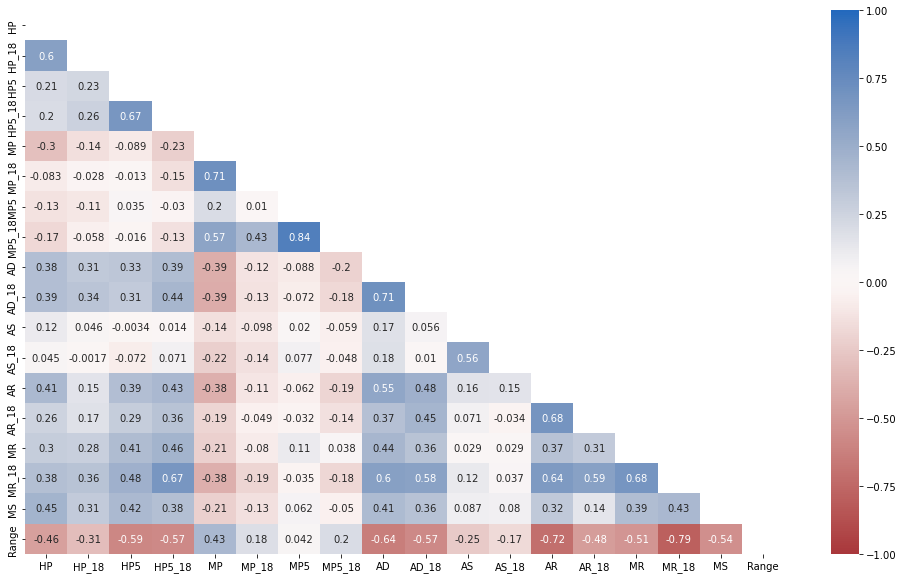

In [26]:
stat_list = ['HP', 'HP_18', 'HP5', 'HP5_18', 'MP', 'MP_18', 'MP5', 'MP5_18',
       'AD', 'AD_18', 'AS', 'AS_18', 'AR', 'AR_18', 'MR', 'MR_18', 'MS', 'Range']

mask = np.triu(np.ones_like(champ_stat[stat_list].corr(), dtype=np.bool))

fig = plt.figure(figsize=(17,10))
ax = sns.heatmap(data = champ_stat[stat_list].corr(), 
                 vmin=-1, 
                 vmax=1, 
                 cmap='vlag_r',
                 mask=mask,
                annot=True)
plt.show()

- Stats HP, HP5, MP, MP5, AD, AS, AR, MR are unsurprisingly correlated with their level 18 counterpart. 
- Range has negative correlation with almost all other Stats. This is likely because Range is such a strong stat and other stats will be lowered to compensate. 
- Range also has strong negative correlation with Armor and MR 

# Analysis of Champion Stats

##### Methods

In [27]:
# Creates a sino plot alongside a histogram 
def sino_hist(gs_sino, gs2_hist, data, x, y, s=5, order = None, palette=None, bins=15):
    # Create sino plot using swarmplot and violinplot
    ax_sino = fig.add_subplot(gs_sino)
    ax_sino = sns.swarmplot(x=x,
                            y=y,
                            data=data,
                            color='k',
                            order = order,
                            s=s)
    
    ax_sino = sns.violinplot(x=x,
                             y=y,
                             data=data,
                             palette = palette,
                             order = order, 
                             cut = 0)
    
    # Create histogram
    ax_histx = fig.add_subplot(gs2_hist)
    ax_histx = sns.histplot(y=y,
                  data=data,
                  bins=bins)
    
    # Set labels and parameters
    ax_histx.set_ylim(ax_sino.get_ylim())
#     ax_histx.tick_params(direction='in', labelleft=False)
    ax_histx.set_ylabel('')
        
    return ax_sino, ax_histx


# Create dashed line at the mean of distribution
def mean_line(data, y, ax, label=None, color = 'red'):
    mean = np.mean(data[y])
    ax.axhline(y=mean,
               color=color,
               label = f'{label} ({mean:.2f})',
               alpha=0.5, 
               linestyle='--')
    if label != None:
        ax.legend()
    

# Sets the xlim of two graphs to the one with bigger range
def set_xlim(ax, ax_18):
    if ax.get_xlim()[1] > ax_18.get_xlim()[1]:
        ax_18.set_xlim(ax.get_xlim())
    else:
        ax.set_xlim(ax_18.get_xlim())
        
sorted_subclass = sorted(pd.unique(champ_stat['subclass_1']))
color = sns.color_palette("hls", 13)

## HP

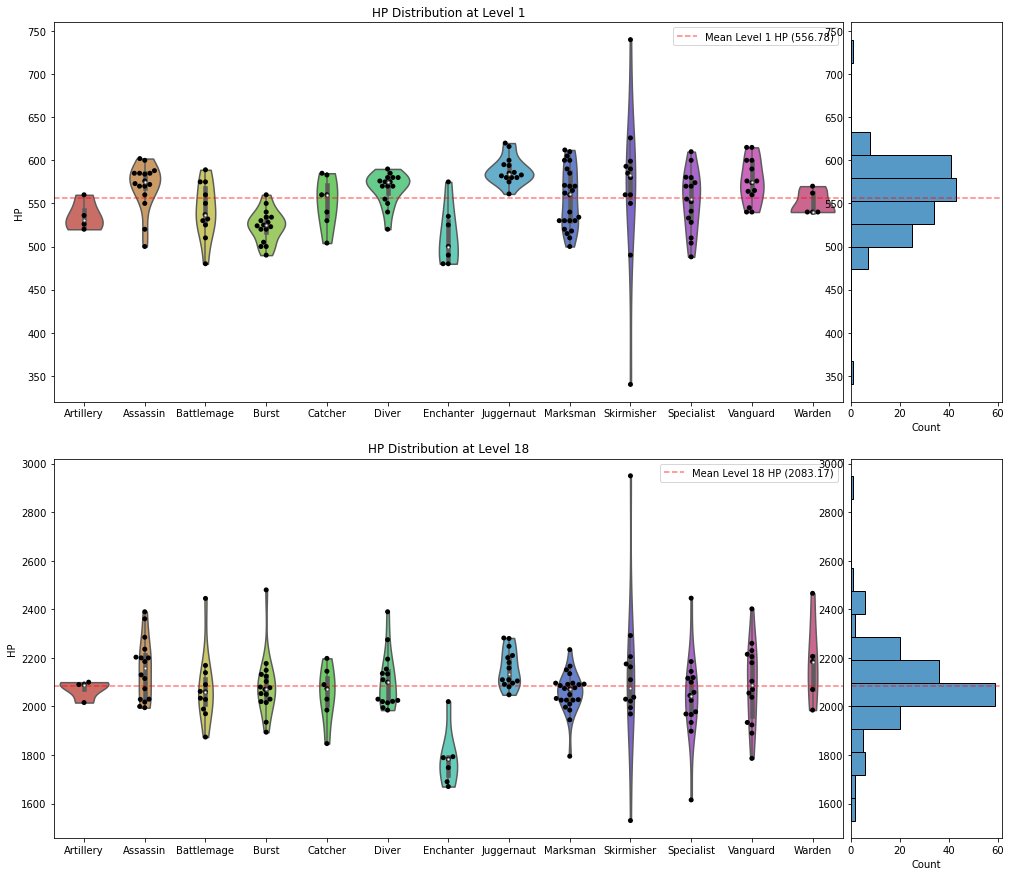

In [28]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 HP
ax_sino, ax_histx= sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='HP',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'HP',
               label = f'Mean Level 1 HP', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'HP',
               ax = ax_histx)

# Graph distribution of level 18 HP
ax_sino18, ax_histx18= sino_hist(
                     gs_sino = gs[1,0:5],
                     gs2_hist = gs[1,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='HP_18',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'HP_18',
               label = 'Mean Level 18 HP', 
               ax = ax_sino18)
mean_line(data=champ_stat,
               y = 'HP_18',
               ax = ax_histx18)

# Sett labels and axis
ax_sino.set_title('HP Distribution at Level 1')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('HP')

ax_sino18.set_title('HP Distribution at Level 18')
ax_sino18.set_xlabel('')
ax_sino18.set_ylabel('HP')

set_xlim(ax_histx, ax_histx18)

plt.show()

- There is obvious outlier in Skirmisher. This turns out to be Kled and Kled & Skaarl, with Kled having below mean HP and Kled & Skaarl have above mean HP.
- All Enchanter's HP is below mean at level 18.
- Juggernaut HP remains above average at level 1 and 18. 

## HP Regeneration per 5 Second

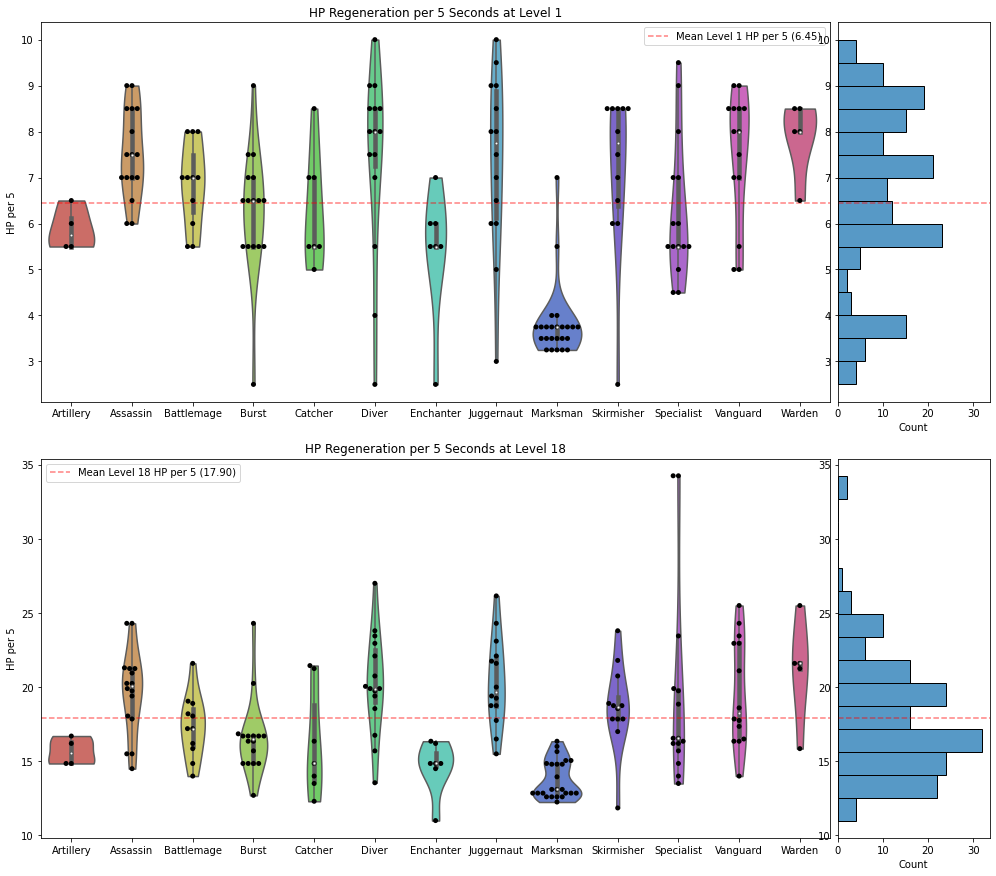

In [29]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 HP5
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='HP5',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'HP5',
               label = f'Mean Level 1 HP per 5', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'HP5',
               ax = ax_histx)


# Graph distribution of level 18 HP5
ax_sino18, ax_histx18 = sino_hist(
                     gs_sino = gs[1,0:5],
                     gs2_hist = gs[1,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='HP5_18',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'HP5_18',
               label = 'Mean Level 18 HP per 5', 
               ax = ax_sino18)
mean_line(data=champ_stat,
               y = 'HP5_18',
               ax = ax_histx18)

# Sett labels and axis
ax_sino.set_title('HP Regeneration per 5 Seconds at Level 1')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('HP per 5')

ax_sino18.set_title('HP Regeneration per 5 Seconds at Level 18')
ax_sino18.set_xlabel('')
ax_sino18.set_ylabel('HP per 5')

set_xlim(ax_histx, ax_histx18)

plt.show()

- All Artillery, Marksman, and Enchanter class have below average HP regeneration at level 18.
- At level 1 all Marksman, with the exception of Kindred, have far below average HP regeneration.
- Gnar and Mega Gnar has the highest HP5 at level 18 with 34.5 HP per 5 seconds.

## Mana Pool

Mana is the main resource to cast abilities in League of Legends, but there exists a handful of champions that used [alternative resource type](https://leagueoflegends.fandom.com/wiki/Ability_resource) (ie, Energy, Health).

Our dataset does not have clear indications on which champions are manaless, but we will use the [wiki](https://leagueoflegends.fandom.com/wiki/Ability_resource) to manually remove these champions. We will also remove Mega Gnar and Kled & Skaarl from the `champ_stat` dataset since they too are manaless.

In [30]:
manaless = ['Aatrox', 'Akali', 'Dr. Mundo', 'Garen', 'Gnar','Mega Gnar', 'Kled & Skaarl', 'Katarina', 'Kennen', 'Kled', 'Lee Sin', 'Mordekaiser', 
            'Rek\'Sai', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Sett', 'Shen', 'Shyvana', 'Tryndamere', 'Viego', 
           'Vladimir', 'Yasuo', 'Yone', 'Zac', 'Zed']
mana_stat = champ_stat[~champ_stat['Champions'].isin(manaless)]

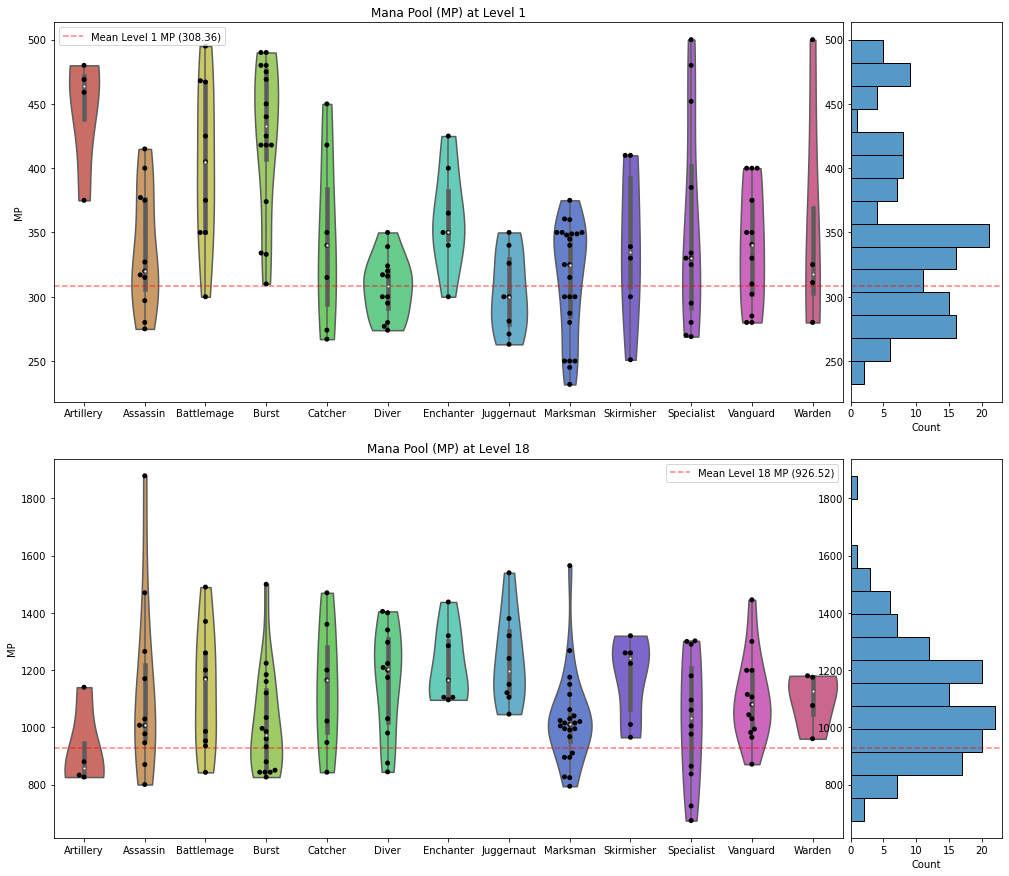

In [31]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 MP
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=mana_stat,
                     x='subclass_1', 
                     y='MP',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'MP',
               label = f'Mean Level 1 MP', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'MP',
               ax = ax_histx)


# Graph distribution of level 18 MP
ax_sino18, ax_histx18 = sino_hist(
                     gs_sino = gs[1,0:5],
                     gs2_hist = gs[1,5],
                     data=mana_stat,
                     x='subclass_1', 
                     y='MP_18',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'MP_18',
               label = 'Mean Level 18 MP', 
               ax = ax_sino18)

mean_line(data=champ_stat,
               y = 'MP_18',
               ax = ax_histx18)

# Sett labels and axis
ax_sino.set_title('Mana Pool (MP) at Level 1')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('MP')

ax_sino18.set_title('Mana Pool (MP) at Level 18')
ax_sino18.set_xlabel('')
ax_sino18.set_ylabel('MP')

set_xlim(ax_histx, ax_histx18)

plt.show()

In [32]:
np.mean(champ_stat['MP_18'])

926.5195

- The range of Mana Pool is quite large at level 18 from 674 to 1879.
- Kassadin has the greatest Mana Pool at 1879 and the next highest is Ezreal at 1565.
- All Enchanter and Warden have above mean Mana Pool

## Mana Regeneration per 5 Second

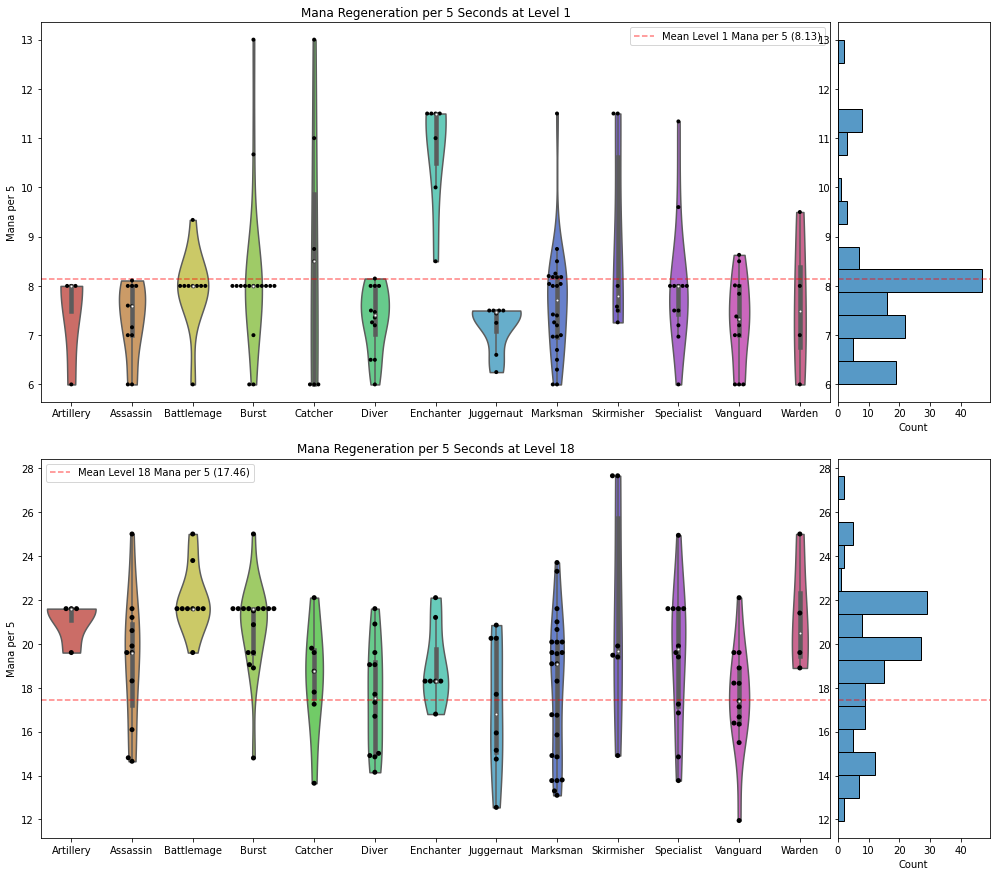

In [33]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 MP5
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=mana_stat,
                     x='subclass_1', 
                     y='MP5',
                     order = sorted_subclass,
                     palette = color,
                     s=4)
mean_line(data=champ_stat,
               y = 'MP5',
               label = f'Mean Level 1 Mana per 5', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'MP5',
               ax = ax_histx)


# Graph distribution of level 18 MP5
ax_sino18, ax_histx18 = sino_hist(
                     gs_sino = gs[1,0:5],
                     gs2_hist = gs[1,5],
                     data=mana_stat,
                     x='subclass_1', 
                     y='MP5_18',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'MP5_18',
               label = 'Mean Level 18 Mana per 5', 
               ax = ax_sino18)
mean_line(data=champ_stat,
               y = 'MP5_18',
               ax = ax_histx18)

# Sett labels and axis
ax_sino.set_title('Mana Regeneration per 5 Seconds at Level 1')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('Mana per 5')

ax_sino18.set_title('Mana Regeneration per 5 Seconds at Level 18')
ax_sino18.set_xlabel('')
ax_sino18.set_ylabel('Mana per 5')

set_xlim(ax_histx, ax_histx18)

plt.show()

## Attack Damage 

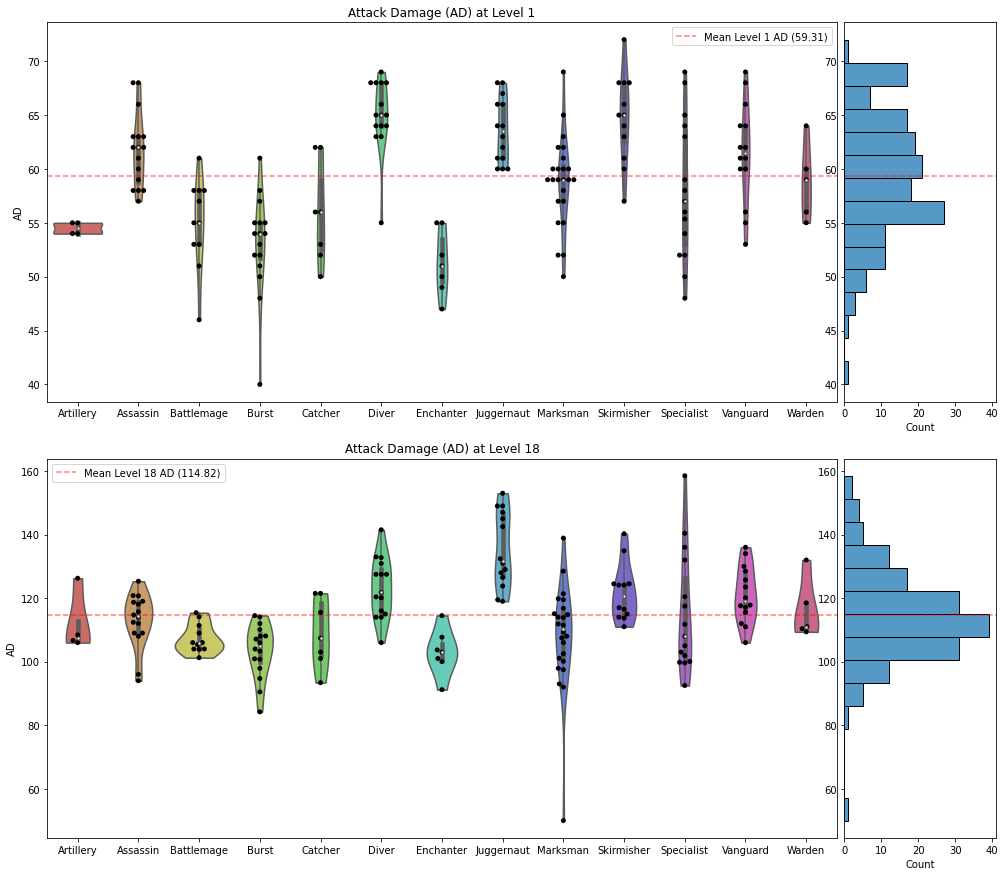

In [34]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 AD
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='AD',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'AD',
               label = f'Mean Level 1 AD', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'AD',
               ax = ax_histx)


# Graph distribution of level 18 HP
ax_sino18, ax_histx18 = sino_hist(
                     gs_sino = gs[1,0:5],
                     gs2_hist = gs[1,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='AD_18',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'AD_18',
               label = 'Mean Level 18 AD', 
               ax = ax_sino18)
mean_line(data=champ_stat,
               y = 'AD_18',
               ax = ax_histx18)


# Sett labels and axis
ax_sino.set_title('Attack Damage (AD) at Level 1')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('AD')

ax_sino18.set_title('Attack Damage (AD) at Level 18')
ax_sino18.set_xlabel('')
ax_sino18.set_ylabel('AD')

set_xlim(ax_histx, ax_histx18)

plt.show()

## Attack Speed

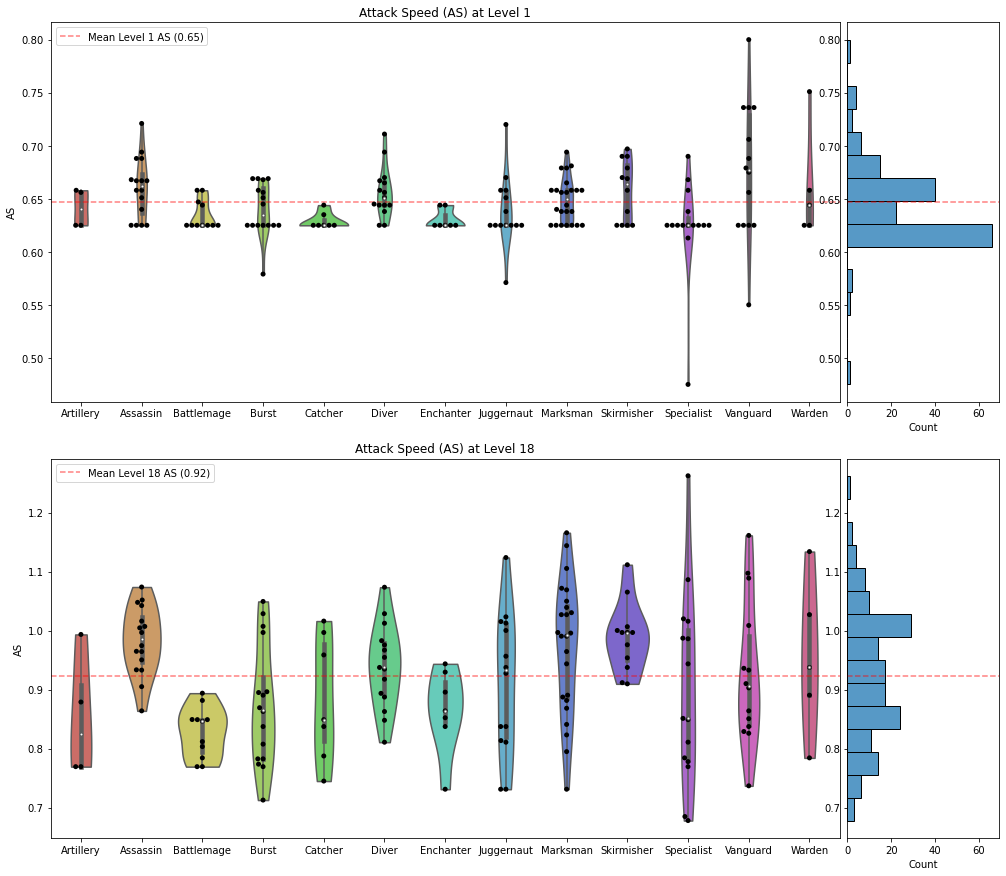

In [35]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 AS
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='AS',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'AS',
               label = f'Mean Level 1 AS', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'AS',
               ax = ax_histx)


# Graph distribution of level 18 AS
ax_sino18, ax_histx18 = sino_hist(
                     gs_sino = gs[1,0:5],
                     gs2_hist = gs[1,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='AS_18',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'AS_18',
               label = f'Mean Level 18 AS', 
               ax = ax_sino18)
mean_line(data=champ_stat,
               y = 'AS_18',
               ax = ax_histx18)


# Sett labels and axis
ax_sino.set_title('Attack Speed (AS) at Level 1')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('AS')

ax_sino18.set_title('Attack Speed (AS) at Level 18')
ax_sino18.set_xlabel('')
ax_sino18.set_ylabel('AS')

set_xlim(ax_histx, ax_histx18)

plt.show()

## Armor

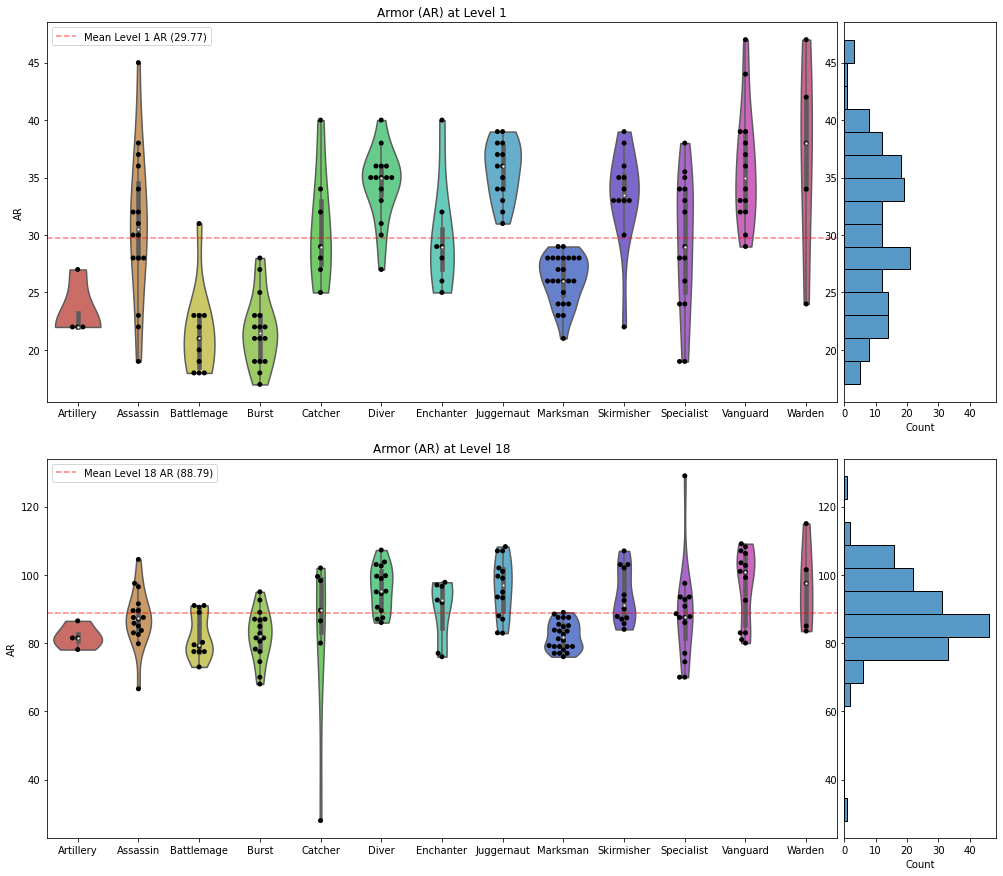

In [36]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 AR
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='AR',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'AR',
               label = f'Mean Level 1 AR', 
               ax = ax_sino)

# Graph distribution of level 18 AR
ax_sino18, ax_histx18 = sino_hist(
                     gs_sino = gs[1,0:5],
                     gs2_hist = gs[1,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='AR_18',
                     order = sorted_subclass,
                     palette = color)
mean_line(data=champ_stat,
               y = 'AR_18',
               label = 'Mean Level 18 AR', 
               ax = ax_sino18)

# Sett labels and axis
ax_sino.set_title('Armor (AR) at Level 1')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('AR')

ax_sino18.set_title('Armor (AR) at Level 18')
ax_sino18.set_xlabel('')
ax_sino18.set_ylabel('AR')

set_xlim(ax_histx, ax_histx18)

plt.show()

## Magic Resist

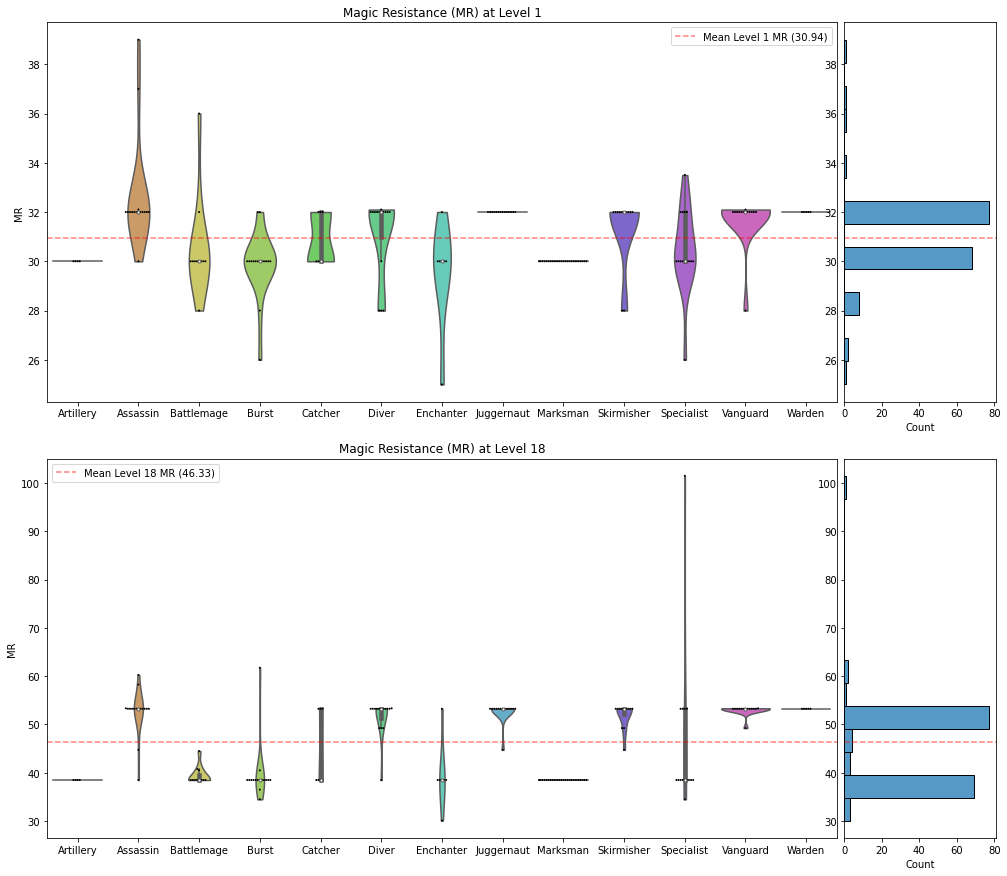

In [37]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 MR
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='MR',
                     order = sorted_subclass,
                     palette = color,
                     s=2)
mean_line(data=champ_stat,
               y = 'MR',
               label = f'Mean Level 1 MR', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'MR',
               ax = ax_histx)


# Graph distribution of level 18 AR
ax_sino18, ax_histx18 = sino_hist(
                     gs_sino = gs[1,0:5],
                     gs2_hist = gs[1,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='MR_18',
                     order = sorted_subclass,
                     palette = color,
                     s=2)
mean_line(data=champ_stat,
               y = 'MR_18',
               label = 'Mean Level 18 MR', 
               ax = ax_sino18)
mean_line(data=champ_stat,
               y = 'MR_18',
               ax = ax_histx18)


# Sett labels and axis
ax_sino.set_title('Magic Resistance (MR) at Level 1')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('MR')

ax_sino18.set_title('Magic Resistance (MR) at Level 18')
ax_sino18.set_xlabel('')
ax_sino18.set_ylabel('MR')

set_xlim(ax_histx, ax_histx18)

plt.show()

In [38]:
champ_stat['MR'].value_counts()

32.0    74
30.0    68
28.0     8
32.1     3
26.0     2
37.0     1
33.5     1
36.0     1
39.0     1
25.0     1
Name: MR, dtype: int64

In [39]:
champ_stat['MR_18'].value_counts()

53.25     68
38.50     68
49.25      6
53.35      3
44.75      3
40.50      2
34.50      2
58.25      1
101.50     1
40.75      1
44.50      1
61.75      1
60.25      1
36.50      1
30.10      1
Name: MR_18, dtype: int64

- Level 1 and Level 18 MR values have bimodal distribution.
- Most of the Level 1 MR are either 32 or 30
- Most of the Level 18 MR are either 53.25 or 38.50
- Marksman and Artillery Share the same MR values from Level 1 to 18
- The two dominant values seems to differentiate the 'tanky' classes from the 'squishy' classes

## Movement Speed

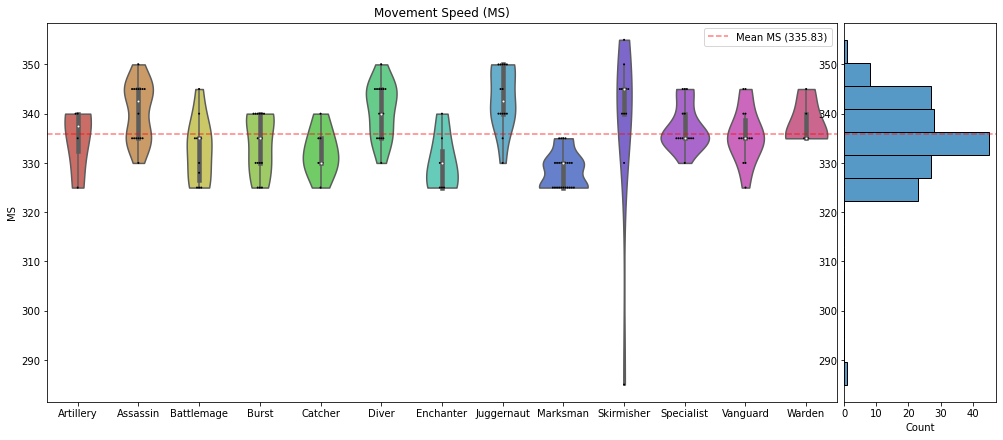

In [40]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 MR
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='MS',
                     order = sorted_subclass,
                     palette = color,
                     s=2)
mean_line(data=champ_stat,
               y = 'MS',
               label = f'Mean MS', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'MS',
               ax = ax_histx)


# Sett labels and axis
ax_sino.set_title('Movement Speed (MS)')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('MS')

plt.show()

- Movement Speed is roughly normally distributed with population Mean 335.82 and Standard Deviation 8.40
- Kled, being the odd man out, has by far the lowest MS with 285.

## Range

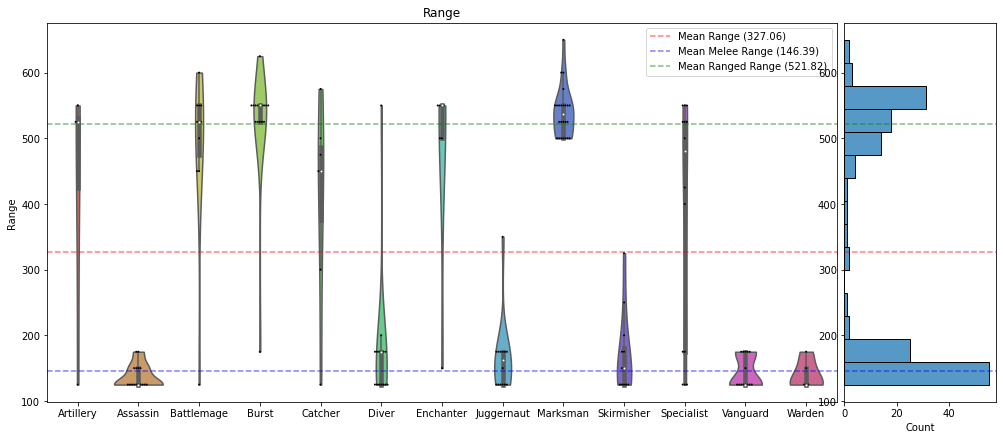

In [41]:
# Create figure
fig = plt.figure(figsize=(17, 15))
gs = fig.add_gridspec(2, 6, wspace = 0.05, hspace=0.15)

# Graph distribution of level 1 MR
ax_sino, ax_histx = sino_hist(
                     gs_sino = gs[0,0:5],
                     gs2_hist = gs[0,5],
                     data=champ_stat,
                     x='subclass_1', 
                     y='Range',
                     order = sorted_subclass,
                     palette = color,
                     s=2)
mean_line(data=champ_stat,
               y = 'Range',
               label = f'Mean Range', 
               ax = ax_sino)
mean_line(data=champ_stat,
               y = 'Range',
               ax = ax_histx)

# Mean for ranged and melee
mean_line(data=champ_stat[champ_stat['Range'] < 300],
               y = 'Range',
               label = f'Mean Melee Range', 
               ax = ax_sino,
               color = 'blue')

mean_line(data=champ_stat[champ_stat['Range'] >= 300],
               y = 'Range',
               label = f'Mean Ranged Range', 
               ax = ax_sino,
               color = 'green')


mean_line(data=champ_stat[champ_stat['Range'] < 300],
               y = 'Range',
               ax = ax_histx,
               color = 'blue')


mean_line(data=champ_stat[champ_stat['Range'] >= 300],
               y = 'Range',
               ax = ax_histx,
               color = 'green')


# Sett labels and axis
ax_sino.set_title('Range')
ax_sino.set_xlabel('')
ax_sino.set_ylabel('Range')

plt.show()

In [42]:
champ_stat.loc[champ_stat['Range'].between(200, 350), ['Champions', 'Range']]

,Champions,Range
42,Irelia,200
61,Kled,250
67,Lillia,325
95,Rakan,300
133,Urgot,350
140,Viego,200


In [43]:
champ_stat.loc[champ_stat['Range'].between(200, 350), ['Champions', 'Range']]

,Champions,Range
42,Irelia,200
61,Kled,250
67,Lillia,325
95,Rakan,300
133,Urgot,350
140,Viego,200


- We see a bimodal distribution separating the melee and ranged champions. 
- We will separate melee as under 300 Range and ranged as 300 or above. 
- Notable rule break, Lilia has range 325 classified as melee and Rakan has range 300 classified as ranged. 
- Champions with multiple forms (Jayce, Nidalee, Elise) are recorded as their main forms. 
    - Jayce as Melee 
    - Nidalee as Ranged
    - Elise as Ranged